In [2]:
!pip install git+https://github.com/isi-usc-edu/pyLIQTR@v0.3.0

  Cloning https://github.com/isi-usc-edu/pyLIQTR (to revision v0.3.0) to /tmp/pip-req-build-11q2608p
  Running command git clone --filter=blob:none --quiet https://github.com/isi-usc-edu/pyLIQTR /tmp/pip-req-build-11q2608p
  Running command git checkout -q 22d874d0f37df1acbe1114e720b4f4b0c5f9b926
  Resolved https://github.com/isi-usc-edu/pyLIQTR to commit 22d874d0f37df1acbe1114e720b4f4b0c5f9b926
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt


<ipython-input-15-9e8b5c26228d>:11: RuntimeWarning: divide by zero encountered in log2
  plt.scatter(x, np.sqrt(np.cos(2**(np.floor(np.log2(x))))), color="orange", s=1)


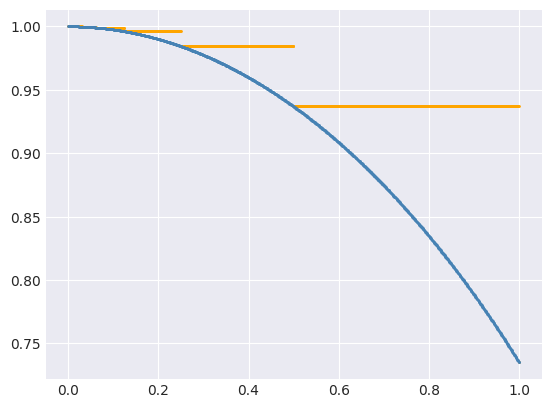

In [ ]:
n =10
a = 0
b = 1
x = np.linspace(a, b, 2**n)



with plt.style.context('seaborn-v0_8-darkgrid'):
  # plt.fill_between(x, np.cos(2**(np.ceil(np.log2(x)))), color="orange", alpha=0.4)
  # plt.fill_between(x, np.cos(x), alpha=0.4,color="blue")
  plt.scatter(x, np.sqrt(np.cos(2**(np.floor(np.log2(x))))), color="orange", s=1)
  plt.scatter(x, np.sqrt(np.cos(x)), s=1, color="steelblue",)
plt.show()

In [4]:
import cirq
import numpy as np
import math
import scipy
from cirq.contrib.svg import SVGCircuit
from typing import Union, Tuple


# Non-increasing

In [ ]:
def rotate_angle(n):

  angle_list = []
  for l in range(0, n):
    M =  np.sqrt(1 + sum([2**((j-1))*np.cos((2**((j-1-n))))**2 for j in range(1, l+2)]))
    angle =  np.arcsin((2**(l/2)*np.cos((2**((l-n)))))/M)
    angle_list.append(angle)
  return angle_list


In [ ]:
circuit = cirq.Circuit()
qubits = [cirq.NamedQubit('out' + str(n-1-i)) for i in range(n)]
angle_list = rotate_angle(n)
circuit.append(cirq.Ry(rads=2*angle_list[n-1]).on(qubits[0]))

for l in range(n-2, -1, -1):
  circuit.append(cirq.CNOT(qubits[n-l-2], qubits[n-l-1]))
  circuit.append(cirq.Ry(rads=2*angle_list[l]).on(qubits[n-l-1]).controlled_by(qubits[n-l-2], control_values=[0]), )

for l in range(1, n):
  circuit.append(cirq.CNOT(qubits[n-l-1], qubits[n-l]), )
  circuit.append(cirq.H(qubits[n-l]).controlled_by(qubits[n-l-1]), )


In [ ]:
normalizer = np.sqrt(1+sum(np.cos(2**(np.floor(np.log2(x[1:]))))**2))

In [ ]:
# Simulate
simulator = cirq.Simulator()

result = simulator.simulate(circuit, qubit_order=qubits)

# Read result
final_state_vector = result.final_state_vector
final_state_vector = np.asarray(final_state_vector, np.float64)

<ipython-input-20-e148b1e43806>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  final_state_vector = np.asarray(final_state_vector, np.float64)


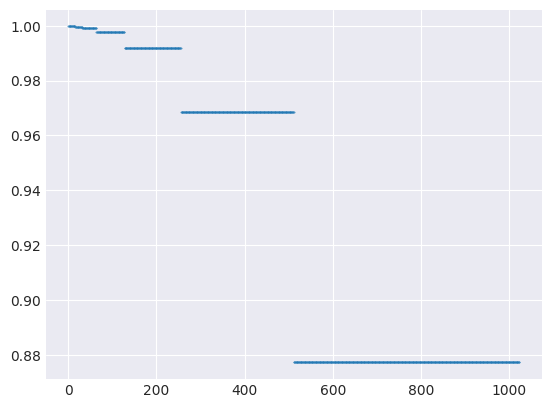

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-v0_8-darkgrid'):
  plt.scatter(np.arange(2**n), final_state_vector*normalizer, s=0.1)

plt.show()

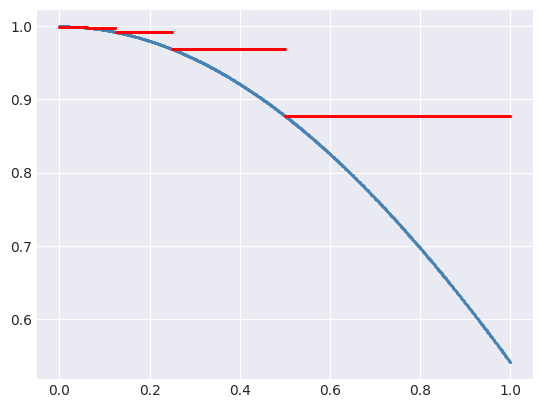

In [ ]:

a = 0
b = 1
x = np.linspace(a, b, 2**n)



with plt.style.context('seaborn-v0_8-darkgrid'):
  # plt.fill_between(x, gaussian(2**(np.floor(np.log2(x))), mu, sig), color="orange", alpha=0.4)
  # plt.fill_between(x, gaussian(x, mu, sig), alpha=0.4,color="blue")

  plt.scatter(x, np.cos(x), s=1, color="steelblue",)
  plt.scatter(x, final_state_vector*normalizer, s=1, color="red",)

plt.show()

In [ ]:
from pyLIQTR.QSP.qsp_helpers import qsp_decompose_once, print_to_openqasm, prettyprint_qsp_to_qasm, count_qubits
from pyLIQTR.gate_decomp.cirq_transforms import clifford_plus_t_direct_transform

# Resource estimation
toffolis = [
    "CCX",
    "ccx",
    "TOFFOLI",
    "toffoli",
]
def count_Toff_gates(circuit):
    '''
    For counting the number of Toffoli Gates in a circuit
    Parameters:
     - circuit: The circuit to count Toffoli Gates in
    Returns:
     - Toff_gate_counter: the number of Toffoli Gates in the circuit
    '''
    Toff_gate_counter = 0

    for moment in circuit:
        for op in moment:
            if (bool([x for x in toffolis if x in str(op)])):
                Toff_gate_counter += 1

    return (Toff_gate_counter)

def count_T_gates(circuit):
    '''
    For counting the number of T-Gates in a circuit
    Parameters:
     - circuit: The circuit to count T-Gates in
    Returns:
     - T_gate_counter: the number of T-Gates in the circuit
    '''
    T_gate_counter = 0

    for moment in circuit:
        for op in moment:
            if (str(op).startswith('T')):
                T_gate_counter += 1

    return (T_gate_counter)


In [ ]:
results = {}
for n in range(2,12):
  print("[INFO] ", n)
  circuit = cirq.Circuit()
  qubits = [cirq.NamedQubit('out' + str(n-1-i)) for i in range(n)]
  angle_list = rotate_angle(n)
  circuit.append(cirq.Ry(rads=2*angle_list[n-1]).on(qubits[0]))

  for l in range(n-2, -1, -1):
    circuit.append(cirq.CNOT(qubits[n-l-2], qubits[n-l-1]))
    circuit.append(cirq.Ry(rads=2*angle_list[l]).on(qubits[n-l-1]).controlled_by(qubits[n-l-2], control_values=[0]), )

  for l in range(1, n):
    circuit.append(cirq.CNOT(qubits[n-l-1], qubits[n-l]), )
    circuit.append(cirq.H(qubits[n-l]).controlled_by(qubits[n-l-1]), )

  decomposed_circuit  = cirq.align_left(qsp_decompose_once(qsp_decompose_once(circuit)))
  cliffT_decomp_circuit   = cirq.align_left(clifford_plus_t_direct_transform(decomposed_circuit))
  t_gate_count = count_T_gates(cliffT_decomp_circuit)
  results[n] = t_gate_count

[INFO]  2
[INFO]  3
[INFO]  4
[INFO]  5
[INFO]  6
[INFO]  7
[INFO]  8
[INFO]  9
[INFO]  10
[INFO]  11
[INFO]  12


KeyboardInterrupt: 

In [ ]:
results

{2: 306,
 3: 508,
 4: 706,
 5: 918,
 6: 1130,
 7: 1338,
 8: 1532,
 9: 1722,
 10: 1936,
 11: 2176}

# Non-decreasing

In [ ]:
def rotate_angle(n):
  angle_list = []
  for l in range(0, n):
    M =  np.sqrt(sum([2**((j-1))*np.sin((2**((j-n))))**2 for j in range(1, l+2)]))
    angle =  np.arcsin((2**((l)/2)*np.sin((2**((l+1-n)))))/M)
    angle_list.append(angle)
  return angle_list

In [ ]:
circuit = cirq.Circuit()
qubits = [cirq.NamedQubit('out' + str(n-1-i)) for i in range(n)]
angle_list = rotate_angle(n)
circuit.append(cirq.Ry(rads=2*angle_list[n-1]).on(qubits[0]))

for l in range(n-2, -1, -1):
  circuit.append(cirq.CNOT(qubits[n-l-2], qubits[n-l-1]))
  circuit.append(cirq.Ry(rads=2*angle_list[l]).on(qubits[n-l-1]).controlled_by(qubits[n-l-2], control_values=[0]), )

for l in range(1, n):
  circuit.append(cirq.CNOT(qubits[n-l-1], qubits[n-l]), )
  circuit.append(cirq.H(qubits[n-l]).controlled_by(qubits[n-l-1]), )


In [ ]:
normalizer = np.sqrt(sum(np.sin(2**(np.ceil(np.log2(x[1:]))))**2))

In [ ]:
# Simulate
simulator = cirq.Simulator()

result = simulator.simulate(circuit, qubit_order=qubits)

# Read result
final_state_vector = result.final_state_vector
final_state_vector = np.asarray(final_state_vector, np.float64)

<ipython-input-72-e148b1e43806>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  final_state_vector = np.asarray(final_state_vector, np.float64)


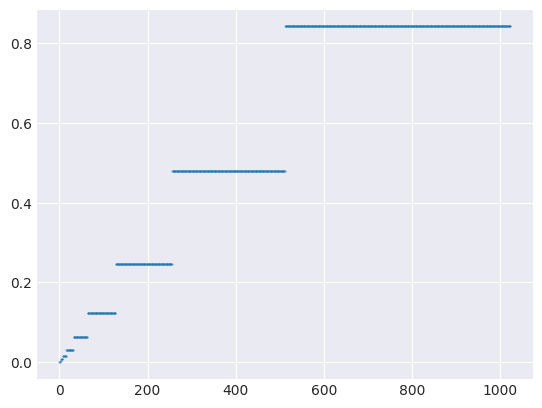

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-v0_8-darkgrid'):
  plt.scatter(np.arange(2**n), final_state_vector*normalizer, s=0.1)

plt.show()

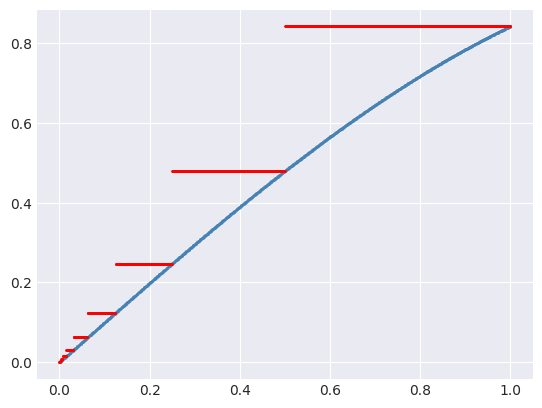

In [ ]:

a = 0
b = 1
x = np.linspace(a, b, 2**n)



with plt.style.context('seaborn-v0_8-darkgrid'):
  # plt.fill_between(x, gaussian(2**(np.floor(np.log2(x))), mu, sig), color="orange", alpha=0.4)
  # plt.fill_between(x, gaussian(x, mu, sig), alpha=0.4,color="blue")

  plt.scatter(x, np.sin(x), s=1, color="steelblue",)
  plt.scatter(x, final_state_vector*normalizer, s=1, color="red",)

plt.show()

In [ ]:
results = {}
for n in range(2,12):
  print("[INFO] ", n)
  circuit = cirq.Circuit()
  qubits = [cirq.NamedQubit('out' + str(n-1-i)) for i in range(n)]
  angle_list = rotate_angle(n)
  circuit.append(cirq.Ry(rads=2*angle_list[n-1]).on(qubits[0]))

  for l in range(n-2, -1, -1):
    circuit.append(cirq.CNOT(qubits[n-l-2], qubits[n-l-1]))
    circuit.append(cirq.Ry(rads=2*angle_list[l]).on(qubits[n-l-1]).controlled_by(qubits[n-l-2], control_values=[0]), )

  for l in range(1, n):
    circuit.append(cirq.CNOT(qubits[n-l-1], qubits[n-l]), )
    circuit.append(cirq.H(qubits[n-l]).controlled_by(qubits[n-l-1]), )

  decomposed_circuit  = cirq.align_left(qsp_decompose_once(qsp_decompose_once(circuit)))
  cliffT_decomp_circuit   = cirq.align_left(clifford_plus_t_direct_transform(decomposed_circuit))
  t_gate_count = count_T_gates(cliffT_decomp_circuit)
  results[n] = t_gate_count

[INFO]  2
[INFO]  3
[INFO]  4
[INFO]  5
[INFO]  6
[INFO]  7
[INFO]  8
[INFO]  9
[INFO]  10
[INFO]  11


In [ ]:
results

{2: 104,
 3: 306,
 4: 516,
 5: 724,
 6: 902,
 7: 1106,
 8: 1330,
 9: 1528,
 10: 1738,
 11: 1958}

# Count T gates

In [5]:
from pyLIQTR.QSP.qsp_helpers import qsp_decompose_once, print_to_openqasm, prettyprint_qsp_to_qasm, count_qubits
from pyLIQTR.gate_decomp.cirq_transforms import clifford_plus_t_direct_transform

def count_T_gates(circuit):
    '''
    For counting the number of T-Gates in a circuit
    Parameters:
     - circuit: The circuit to count T-Gates in
    Returns:
     - T_gate_counter: the number of T-Gates in the circuit
    '''
    T_gate_counter = 0

    for moment in circuit:
        for op in moment:
            if (str(op).startswith('T')):
                T_gate_counter += 1

    return (T_gate_counter)

In [16]:
circuit = cirq.Circuit()
n= 4
qubits = [cirq.NamedQubit('out' + str(i)) for i in range(n)]
qubits

[cirq.NamedQubit('out0'),
 cirq.NamedQubit('out1'),
 cirq.NamedQubit('out2'),
 cirq.NamedQubit('out3')]

In [17]:
circuit.append(cirq.X.on(qubits[n-1]).controlled_by(*qubits[0:n-1]))
circuit

out0: ───@───
         │
out1: ───@───
         │
out2: ───@───
         │
out3: ───X───

In [18]:
decomposed_circuit  = cirq.align_left(qsp_decompose_once(qsp_decompose_once(circuit)))
cliffT_decomp_circuit   = cirq.align_left(clifford_plus_t_direct_transform(decomposed_circuit))
t_gate_count = count_T_gates(cliffT_decomp_circuit)

T(out2)


TypeError: object of type <class 'cirq.ops.gate_operation.GateOperation'> does have a _decompose_ method, but it returned NotImplemented or None.

In [19]:
t_gate_count

3703

In [20]:
class Comparator:
  def __init__(self, A, B):
    """
        :param A: The quantum register holding the first number
        :param B: The quantum register second number
    """
    self.A = A
    self.B = B
    self.length = len(A)


  def compare2(self, a0: cirq.NamedQubit, b0: cirq.NamedQubit, a1:cirq.NamedQubit, b1:cirq.NamedQubit, name: str) -> [cirq.Circuit, cirq.NamedQubit, cirq.NamedQubit]:
    # Compare a pair of two bits
    p = cirq.NamedQubit("ancilla_comp2_{}".format(name))
    compare2 = cirq.Circuit()
    compare2.append(cirq.X(p))
    compare2.append(cirq.CNOT(b1,a1), strategy=cirq.InsertStrategy.EARLIEST)
    compare2.append(cirq.CNOT(b0,a0), strategy=cirq.InsertStrategy.EARLIEST)
    # compare2.append(cirq.CSWAP(a1, a0, p), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.CCNOT(a1, a0, p), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.CCNOT(a1, p, a0), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.CCNOT(a1, a0, p), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

    # compare2.append(cirq.CSWAP(a1, b1, b0), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.TOFFOLI(a1, b1, b0), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.TOFFOLI(a1, b0, b1), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    compare2.append(cirq.TOFFOLI(a1, b1, b0), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

    compare2.append(cirq.CNOT(b0,a0), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

    return compare2, a0, b0


  def finalizer(self, a: cirq.NamedQubit, b: cirq.NamedQubit) -> cirq.Circuit:
    # verify b>a

    self.anc1 = cirq.NamedQubit("ancilla_fin")

    final_cir = cirq.Circuit()
    final_cir.append(cirq.X(a), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    final_cir.append(cirq.TOFFOLI(a,b, self.anc1), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    final_cir.append(cirq.X(a), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)

    return final_cir

  def construct_circuit(self,) -> cirq.Circuit:
    self.circuit = cirq.Circuit()
    two_bitwise_compare = {}
    qubits_out_acc_layer = {}
    for j in range(0, int(math.log2(self.length))):
      two_bitwise_compare[j] = []
      qubits_out_acc_layer[j] = []
    # first layer
    for i in range(0, self.length//2):
      cir, a_out, b_out = self.compare2(self.A[2*i], self.B[2*i], self.A[2*i+1], self.B[2*i+1], name="0_"+str(i))
      two_bitwise_compare[0].append(cir)
      qubits_out_acc_layer[0].append([a_out, b_out])
    # later layer
    for j in range(1, int(math.log2(self.length))):
      for i in range(len(qubits_out_acc_layer[j-1])//2):
        cir, a_out, b_out = self.compare2(*qubits_out_acc_layer[j-1][2*i], *qubits_out_acc_layer[j-1][2*i+1], name=str(j)+"_"+str(i))
        two_bitwise_compare[j].append(cir)
        qubits_out_acc_layer[j].append([a_out, b_out])


    final_compare = self.finalizer(*qubits_out_acc_layer[int(math.log2(self.length))-1][0])
    for j in range(0, int(math.log2(self.length))):
      self.circuit.append((two_bitwise_compare[j]), strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    self.circuit.append(final_compare, strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
    return self.circuit

In [21]:
n = 30
A_qubits = [cirq.NamedQubit('a' + str(i)) for i in range(n)]
B_qubits = [cirq.NamedQubit('b' + str(i)) for i in range(n)]
circuit = Comparator(A_qubits, B_qubits).construct_circuit()

In [22]:
decomposed_circuit  = cirq.align_left(qsp_decompose_once(qsp_decompose_once(circuit)))
cliffT_decomp_circuit   = cirq.align_left(clifford_plus_t_direct_transform(decomposed_circuit))
t_gate_count = count_T_gates(cliffT_decomp_circuit)
t_gate_count

1099